In [431]:
# Top Games on Google Play Store 

# Created by: Jehwan Bang

# Date: 2021-07-13


# Install packages 
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\je111\Downloads\android-games.csv')

df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [432]:
df.shape

(1730, 15)

In [433]:
# Check to see the data type and if there is any missing data in each column
df.info()
# We can also check separately if we want
# check to see if there is any missing dta in each column
# for col in df.columns:
#    pct_missing = np.mean(df[col].isnull())
#    print('{} - {}%'.format(col, round(pct_missing*100)))
# Check the Data Types for each column
# print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


In [434]:
# Converting installs to number Million

def installs(x):
    if x[-1] == 'M':
        return(float(x[:-2]))
    else:
        return(float(x[:-2]) / 1000)
df['installs'] = df['installs'].apply(installs)
df['installs'].head()

0    500.0
1    500.0
2    100.0
3    100.0
4    500.0
Name: installs, dtype: float64

In [435]:
# Update Columns with more accurate numbers
# total ratings should be the sum of 5 star... 1 start rating 
df['total ratings'] = df['5 star ratings']+df['4 star ratings']+df['3 star ratings']+df['2 star ratings']+df['1 star ratings']

# average rating should be decimal numbers
df['average rating'] = (5*df['5 star ratings']+4*df['4 star ratings']+3*df['3 star ratings']+2*df['2 star ratings']+df['1 star ratings'])/df['total ratings']

df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273127,500.0,4.216242,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276729,500.0,4.304170,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663592,100.0,4.126486,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971550,100.0,4.265578,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464233,500.0,4.329449,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [436]:
#If there is a duplicate then remove them
df.drop_duplicates().head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273127,500.0,4.216242,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276729,500.0,4.304170,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663592,100.0,4.126486,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971550,100.0,4.265578,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464233,500.0,4.329449,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


<AxesSubplot:>

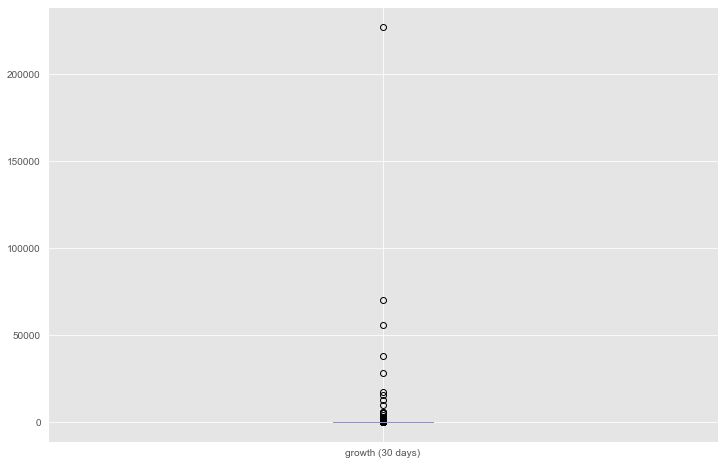

In [437]:
# Check for outlier 
df.boxplot(column=['growth (30 days)'])
# We do see potential outliers

<AxesSubplot:>

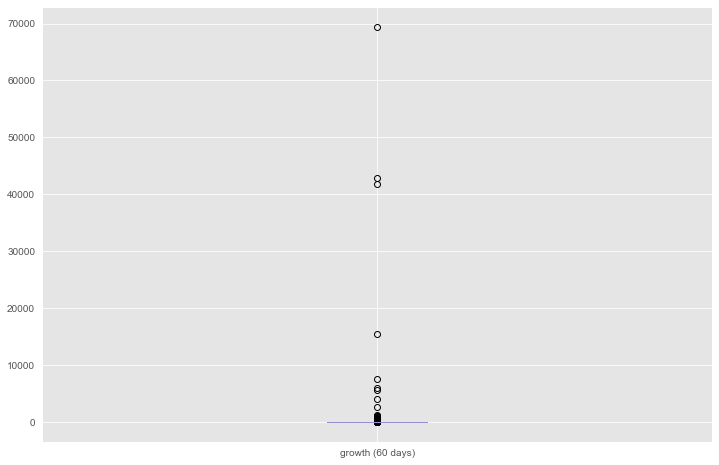

In [438]:
df.boxplot(column=['growth (60 days)'])
# We do see potential outliers

In [439]:
# Grouping by game category
cat = df.groupby(['category'])[["average rating","growth (30 days)","growth (60 days)"]].mean()
cat2 = df.groupby(['category'])[['category']].count()
cat2.columns =['categorycount']
cat1 = cat1.merge(cat2, on=['category'],how='right')
cat1.sort_values(['average rating','growth (30 days)'], ascending = False).head(5)
# Some growths are a lot higher than others because of the possible outlier

,average rating,growth (30 days),growth (60 days),categorycount_x,categorycount_y,categorycount
category,,,,,,
GAME WORD,4.455887,25.046237,62.223656,93,104,104
GAME CASINO,4.454319,2453.994737,2.251579,95,100,100
GAME PUZZLE,4.428427,10.220000,20.076364,55,100,100
GAME CARD,4.416997,847.400000,630.197297,111,126,126
GAME CASUAL,4.354141,58.815094,26.418868,53,100,100


C:\Users\je111\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 36229 missing from current font.

C:\Users\je111\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 32026 missing from current font.

C:\Users\je111\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 21934 missing from current font.

C:\Users\je111\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 23383 missing from current font.

C:\Users\je111\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 29579 missing from current font.

C:\Users\je111\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 33521 missing from current font.

C:\Users\je111\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 27298 missing from current font.

C:\Users\je111\anaco

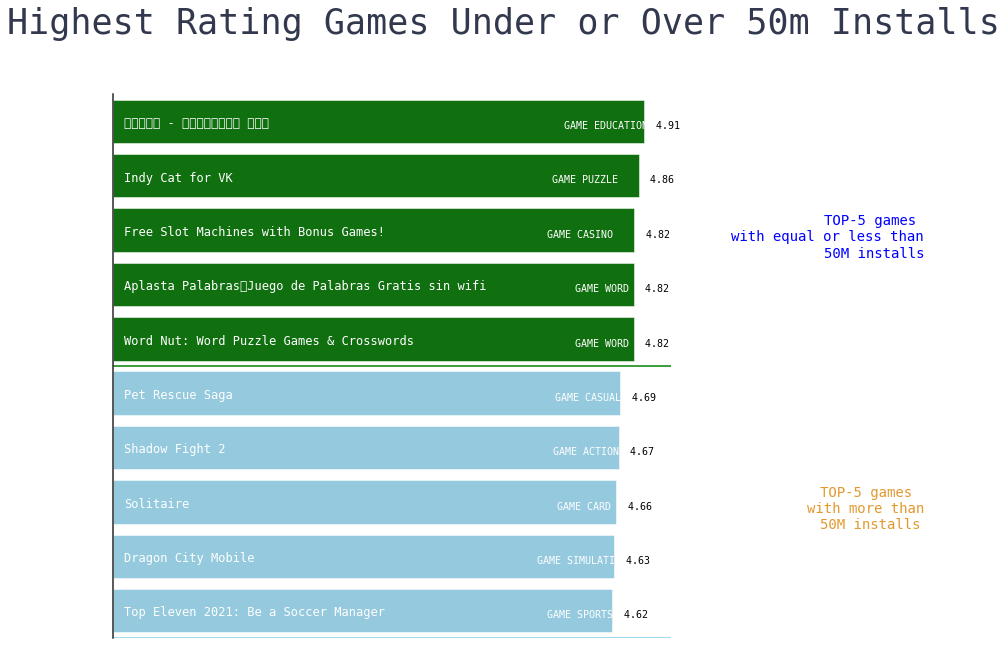

In [481]:
installs_under_50m = df.query("installs <= 50").sort_values('average rating', ascending = False).head(5)
installs_over_50m = df.query("installs > 50").sort_values('average rating', ascending = False).head(5)
installs_rank = pd.concat([installs_under_50m, installs_over_50m], ignore_index = True)
plt.figure(figsize = (10, 10))
sns.set_style("white")
plt.title('Highest Rating Games Under or Over 50m Installs', fontname = 'monospace', fontsize = 35, color = '#32384D', x = 0.7, y = 1.1)
clrs = []
for i in range(len(installs_rank)):
    if installs_rank.iloc[i,3] <= 50:
        clrs.append('green')
    else:
        clrs.append('skyblue')
        
a = sns.barplot(data = installs_rank, x = 'average rating', y = 'title', palette = clrs)
plt.axhline(4.5, 0, 1, color = 'green')
plt.axhline(9.5, 0, 1, color = 'skyblue')
plt.xticks([])
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

for p in a.patches:
    width = p.get_width()
    plt.text(0.05 + p.get_width(), p.get_y() + 0.6*p.get_height(), f'{width: 0.2f}',
             ha = 'left', va = 'center', fontname = 'monospace', color = 'black')
    
cat = installs_rank['category'].to_list()    
for i in range(len(a.patches)):  
    width = a.patches[i].get_width()
    if i == 1 or i == 2:
        plt.text(width - 0.5, a.patches[i].get_y() + 0.6*a.patches[i].get_height(), cat[i], ha = 'center', va = 'center',
                 fontname = 'monospace', fontsize = 10, color = 'white')
    else:
        plt.text(width - 0.3, a.patches[i].get_y() + 0.6*a.patches[i].get_height(), cat[i], ha = 'center', va = 'center',
                 fontname = 'monospace', fontsize = 10, color = 'white')
    
titles = installs_rank['title'].to_list()
for i in range(len(cat)):
    a.text(0.1, i+0.1, titles[i], fontname = 'monospace', fontsize = 12, color = 'white')
    
for q in [a]:
    q.spines['left'].set_linewidth(1.5)
    for w in ['right', 'top', 'bottom']:
        q.spines[w].set_visible(False)
        
a.text(7.5, 2.5, '''TOP-5 games 
with equal or less than
50M installs''', ha = 'right', fontname = 'monospace', fontsize = 14, color = 'Blue')


a.text(7.0, 7.5, '''TOP-5 games 
with more than 
50M installs''', ha = 'center', fontname = 'monospace', fontsize = 14, color = '#E29930')

plt.show()

C:\Users\je111\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 3604 missing from current font.

C:\Users\je111\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 3633 missing from current font.

C:\Users\je111\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 3617 missing from current font.

C:\Users\je111\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 3637 missing from current font.

C:\Users\je111\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 3656 missing from current font.

C:\Users\je111\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 3652 missing from current font.

C:\Users\je111\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 3614 missing from current font.

C:\Users\je111\anaconda3\li

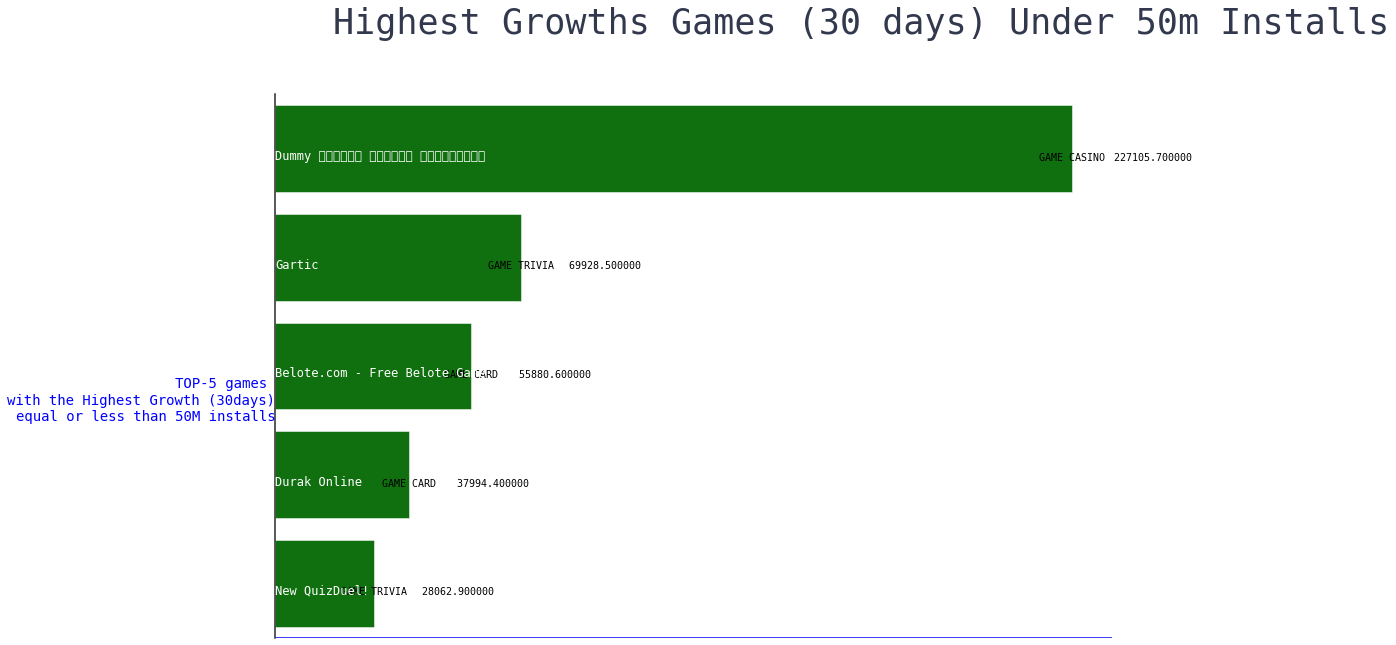

In [514]:
installs_under_50m = df.query("installs <= 50").sort_values('growth (30 days)', ascending = False).head(5)
installs_rank = installs_under_50m
plt.figure(figsize = (15, 10))
sns.set_style("white")
plt.title('Highest Growths Games (30 days) Under 50m Installs', fontname = 'monospace', fontsize = 35, color = '#32384D', x = 0.7, y = 1.1)
clrs = []
for i in range(len(installs_rank)):
    if installs_rank.iloc[i,3] <= 50:
        clrs.append('green')
    else:
        clrs.append('skyblue')
        
a = sns.barplot(data = installs_rank, x = 'growth (30 days)', y = 'title', palette = clrs)
plt.axhline(4.5, 0, 1, color = 'blue')
plt.xticks([])
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

for p in a.patches:
    width = p.get_width()
    plt.text(0.05 + p.get_width(), p.get_y() + 0.6*p.get_height(), f'{width: 20f}',
             ha = 'left', va = 'center', fontname = 'monospace', color = 'black')
    
cat = installs_rank['category'].to_list()    
for i in range(len(a.patches)):  
    width = a.patches[i].get_width()
    if i == 1 or i == 2:
        plt.text(width - 0.5, a.patches[i].get_y() + 0.6*a.patches[i].get_height(), cat[i], ha = 'center', va = 'center',
                 fontname = 'monospace', fontsize = 10, color = 'black')
    else:
        plt.text(width - 0.3, a.patches[i].get_y() + 0.6*a.patches[i].get_height(), cat[i], ha = 'center', va = 'center',
                 fontname = 'monospace', fontsize = 10, color = 'black')
    
titles = installs_rank['title'].to_list()
for i in range(len(cat)):
    a.text(0.1, i+0.1, titles[i], fontname = 'monospace', fontsize = 12, color = 'white')
    
for q in [a]:
    q.spines['left'].set_linewidth(1.5)
    for w in ['right', 'top', 'bottom']:
        q.spines[w].set_visible(False)
        
a.text(7, 2.5, '''TOP-5 games 
with the Highest Growth (30days)
equal or less than 50M installs''', ha = 'right', fontname = 'monospace', fontsize = 14, color = 'Blue')

plt.show()

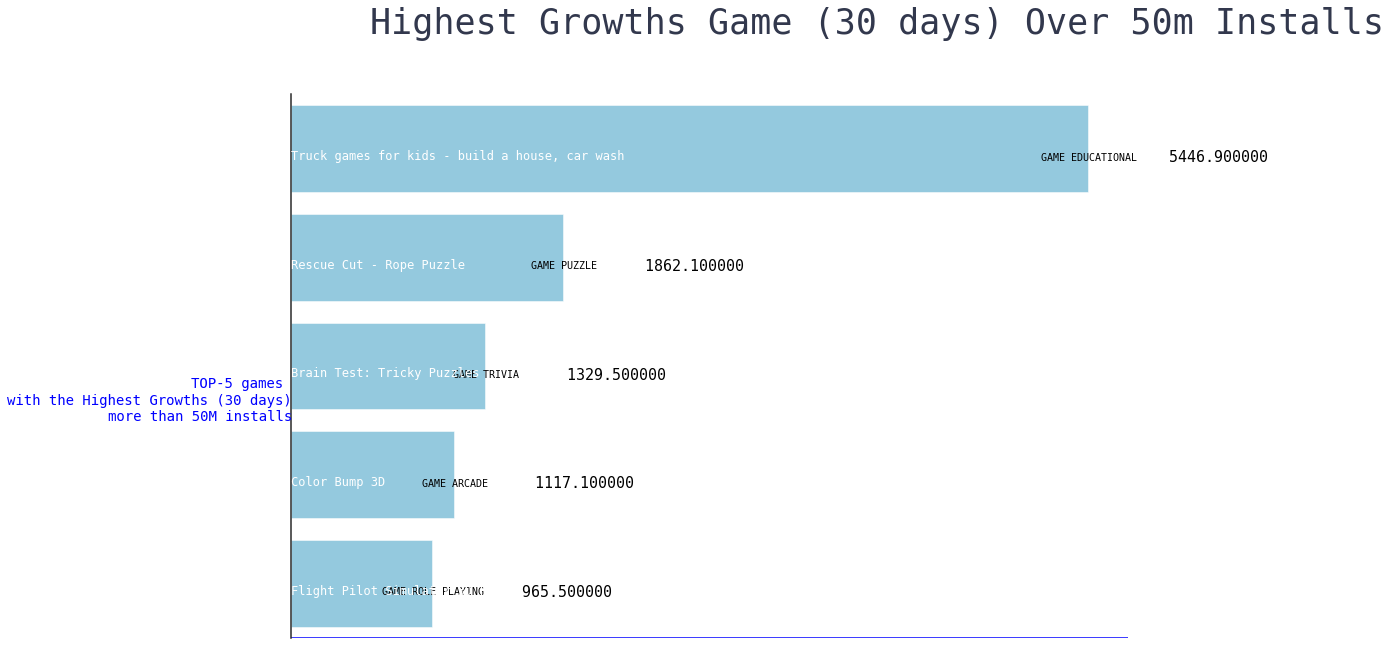

In [506]:
installs_over_50m = df.query("installs > 50").sort_values('growth (30 days)', ascending = False).head(5)
installs_rank = installs_over_50m
plt.figure(figsize = (15, 10))
sns.set_style("white")
plt.title('Highest Growths Game (30 days) Over 50m Installs', fontname = 'monospace', fontsize = 35, color = '#32384D', x = 0.7, y = 1.1)
clrs = []
for i in range(len(installs_rank)):
    if installs_rank.iloc[i,3] <= 50:
        clrs.append('green')
    else:
        clrs.append('skyblue')
        
a = sns.barplot(data = installs_rank, x = 'growth (30 days)', y = 'title', palette = clrs)
plt.axhline(4.5, 0, 1, color = 'blue')
plt.xticks([])
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

for p in a.patches:
    width = p.get_width()
    plt.text(0.5 + p.get_width(), p.get_y() + 0.6*p.get_height(), f'{width: 20f}',
             ha = 'left', va = 'center', fontname = 'monospace', fontsize = 15, color = 'black')
    
cat = installs_rank['category'].to_list()    
for i in range(len(a.patches)):  
    width = a.patches[i].get_width()
    if i == 1 or i == 2:
        plt.text(width + 5, a.patches[i].get_y() + 0.6*a.patches[i].get_height(), cat[i], ha = 'center', va = 'center',
                 fontname = 'monospace', fontsize = 10, color = 'black')
    else:
        plt.text(width + 5, a.patches[i].get_y() + 0.6*a.patches[i].get_height(), cat[i], ha = 'center', va = 'center',
                 fontname = 'monospace', fontsize = 10, color = 'black')
    
titles = installs_rank['title'].to_list()
for i in range(len(cat)):
    a.text(0.1, i+0.1, titles[i], fontname = 'monospace', fontsize = 12, color = 'white')
    
for q in [a]:
    q.spines['left'].set_linewidth(1.5)
    for w in ['right', 'top', 'bottom']:
        q.spines[w].set_visible(False)
        
a.text(7, 2.5, '''TOP-5 games 
with the Highest Growths (30 days)
more than 50M installs''', ha = 'right', fontname = 'monospace', fontsize = 14, color = 'Blue')


plt.show()

C:\Users\je111\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 51064 missing from current font.

C:\Users\je111\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 49373 missing from current font.

C:\Users\je111\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 50669 missing from current font.

C:\Users\je111\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 51204 missing from current font.

C:\Users\je111\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 50999 missing from current font.

C:\Users\je111\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 45440 missing from current font.

C:\Users\je111\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 51060 missing from current font.

C:\Users\je111\anaco

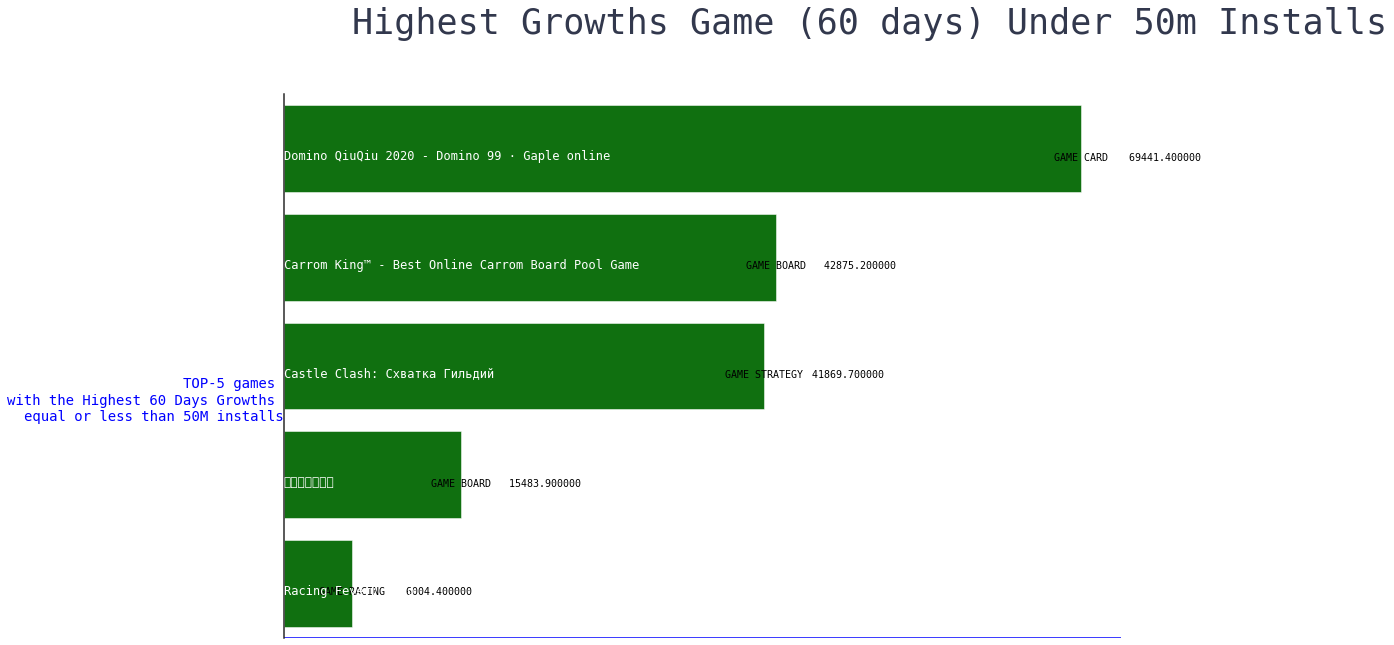

In [507]:
installs_under_50m = df.query("installs <= 50").sort_values('growth (60 days)', ascending = False).head(5)
installs_rank = installs_under_50m
plt.figure(figsize = (15, 10))
sns.set_style("white")
plt.title('Highest Growths Game (60 days) Under 50m Installs', fontname = 'monospace', fontsize = 35, color = '#32384D', x = 0.7, y = 1.1)
clrs = []
for i in range(len(installs_rank)):
    if installs_rank.iloc[i,3] <= 50:
        clrs.append('green')
    else:
        clrs.append('skyblue')
        
a = sns.barplot(data = installs_rank, x = 'growth (60 days)', y = 'title', palette = clrs)
plt.axhline(4.5, 0, 1, color = 'blue')
plt.xticks([])
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

for p in a.patches:
    width = p.get_width()
    plt.text(0.05 + p.get_width(), p.get_y() + 0.6*p.get_height(), f'{width: 20f}',
             ha = 'left', va = 'center', fontname = 'monospace', color = 'black')
    
cat = installs_rank['category'].to_list()    
for i in range(len(a.patches)):  
    width = a.patches[i].get_width()
    if i == 1 or i == 2:
        plt.text(width - 0.5, a.patches[i].get_y() + 0.6*a.patches[i].get_height(), cat[i], ha = 'center', va = 'center',
                 fontname = 'monospace', fontsize = 10, color = 'black')
    else:
        plt.text(width - 0.3, a.patches[i].get_y() + 0.6*a.patches[i].get_height(), cat[i], ha = 'center', va = 'center',
                 fontname = 'monospace', fontsize = 10, color = 'black')
    
titles = installs_rank['title'].to_list()
for i in range(len(cat)):
    a.text(0.1, i+0.1, titles[i], fontname = 'monospace', fontsize = 12, color = 'white')
    
for q in [a]:
    q.spines['left'].set_linewidth(1.5)
    for w in ['right', 'top', 'bottom']:
        q.spines[w].set_visible(False)
        
a.text(6.5, 2.5, '''TOP-5 games 
with the Highest 60 Days Growths 
equal or less than 50M installs''', ha = 'right', fontname = 'monospace', fontsize = 14, color = 'Blue')


plt.show()

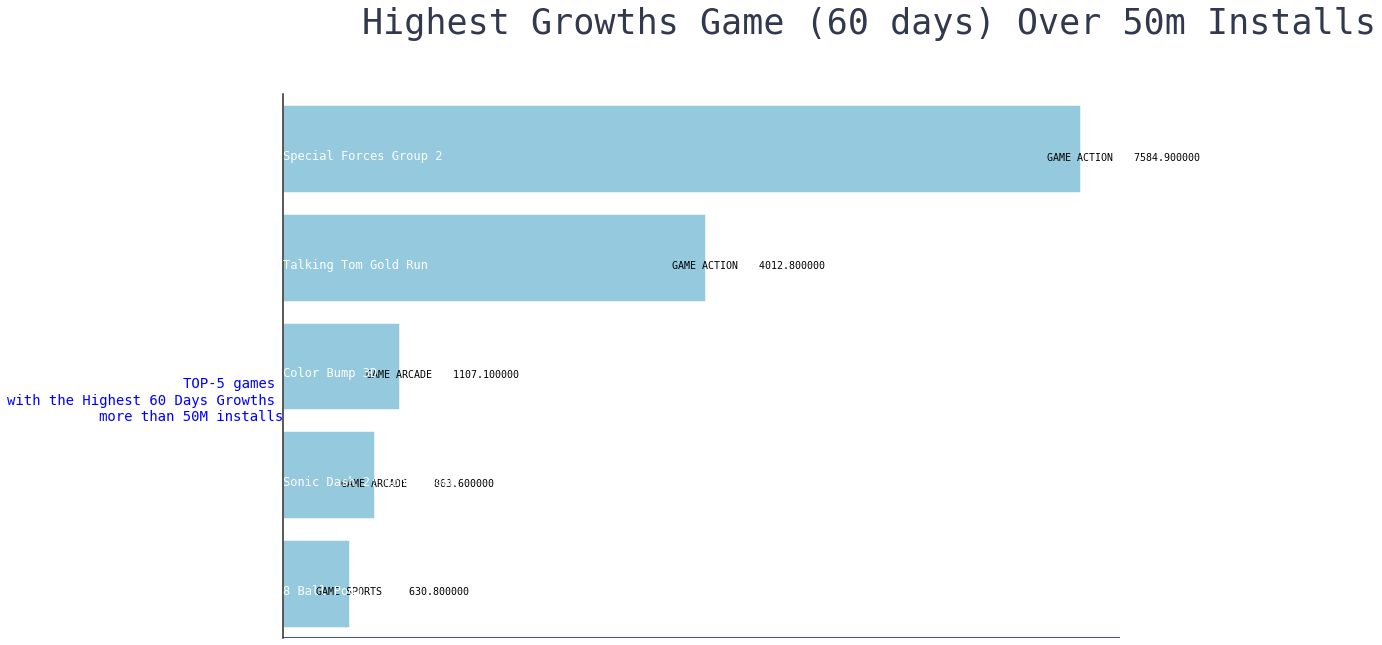

In [508]:
installs_over_50m = df.query("installs > 50").sort_values('growth (60 days)', ascending = False).head(5)
installs_rank = installs_over_50m
plt.figure(figsize = (15, 10))
sns.set_style("white")
plt.title('Highest Growths Game (60 days) Over 50m Installs', fontname = 'monospace', fontsize = 35, color = '#32384D', x = 0.7, y = 1.1)
clrs = []
for i in range(len(installs_rank)):
    if installs_rank.iloc[i,3] <= 50:
        clrs.append('green')
    else:
        clrs.append('skyblue')
        
a = sns.barplot(data = installs_rank, x = 'growth (60 days)', y = 'title', palette = clrs)
plt.axhline(4.5, 0, 1, color = 'blue')
plt.xticks([])
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

for p in a.patches:
    width = p.get_width()
    plt.text(0.05 + p.get_width(), p.get_y() + 0.6*p.get_height(), f'{width: 20f}',
             ha = 'left', va = 'center', fontname = 'monospace', color = 'black')
    
cat = installs_rank['category'].to_list()    
for i in range(len(a.patches)):  
    width = a.patches[i].get_width()
    if i == 1 or i == 2:
        plt.text(width - 0.5, a.patches[i].get_y() + 0.6*a.patches[i].get_height(), cat[i], ha = 'center', va = 'center',
                 fontname = 'monospace', fontsize = 10, color = 'black')
    else:
        plt.text(width - 0.3, a.patches[i].get_y() + 0.6*a.patches[i].get_height(), cat[i], ha = 'center', va = 'center',
                 fontname = 'monospace', fontsize = 10, color = 'black')
    
titles = installs_rank['title'].to_list()
for i in range(len(cat)):
    a.text(0.1, i+0.1, titles[i], fontname = 'monospace', fontsize = 12, color = 'white')
    
for q in [a]:
    q.spines['left'].set_linewidth(1.5)
    for w in ['right', 'top', 'bottom']:
        q.spines[w].set_visible(False)
        
a.text(6.5, 2.5, '''TOP-5 games 
with the Highest 60 Days Growths 
more than 50M installs''', ha = 'right', fontname = 'monospace', fontsize = 14, color = 'Blue')


plt.show()

In [ ]:
#We do see that Game Action is leading in the longrun which is the installs over 50m and growths(60 days)

In [335]:
paid_free= df['paid'].value_counts()
label =['Free','Paid']
fig = px.pie(paid_free, values=df['paid'].value_counts().values, names=label,
             title='Free VS Paid Games')
fig.update_traces( textposition='auto', textinfo='label+percent')
fig.show()
#Make sense as people would download more of free game and 
#game inventors still could make money by advertising and selling items inside the game

In [289]:

cat = df.groupby('category').sum().reset_index()
x= cat['category']
fig = go.Figure(go.Bar(x=x, y=cat['installs'], name='total_installs'))

fig.update_layout(template = "simple_white",
               title_text="Total_installs of Different Game Categories", xaxis = {'categoryorder':'total descending'})
fig.show()
#Game Action got the most installs.

In [510]:

cat = df.groupby('category').sum().reset_index()
x= cat['category']
fig = go.Figure(go.Bar(x=x, y=cat['5 star ratings'], name='5 Star'))
fig.add_trace(go.Bar(x=x, y=cat['4 star ratings'], name='4 Star'))
fig.add_trace(go.Bar(x=x, y=cat['3 star ratings'], name='3 Star'))
fig.add_trace(go.Bar(x=x, y=cat['2 star ratings'], name='2 Star'))
fig.add_trace(go.Bar(x=x, y=cat['1 star ratings'], name='1 Star'))

fig.update_layout(barmode='stack', template = "simple_white",
               title_text="Rating Distribution of Different Game Categories", xaxis = {'categoryorder':'total descending'})
fig.show()
# We do see that Game Action got the most 5 star ratings. We do see the pattern of 5>1>4>3>2 star.

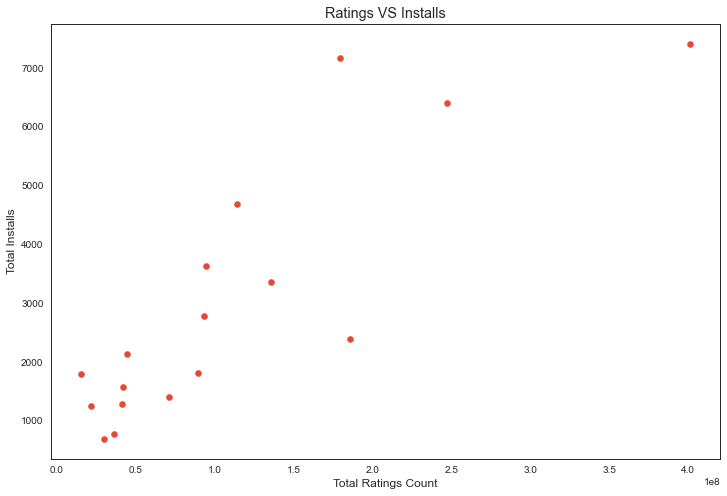

In [292]:
plt.scatter(x=cat['total ratings'], y=cat['installs'], alpha=1)
plt.title('Ratings VS Installs')
plt.xlabel('Total Ratings Count')
plt.ylabel('Total Installs')
plt.show()

In [511]:
np.corrcoef(x=cat['total ratings'], y=cat['installs'])

array([[1.        , 0.85274614],
       [0.85274614, 1.        ]])

In [ ]:
# We do see the positive corrlation value which means that high number of ratings also 
# shows high number of installs within each category Same for opposite, low number of ratings then we see low number of installs